In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

MSE for alpha0.001 : 20922599.87103596
MSE for alpha0.01 : 20922527.32662988
MSE for alpha0.1 : 20921803.698431373
MSE for alpha1 : 20914832.635089133
MSE for alpha2 : 20908106.77995452
MSE for alpha5 : 20890881.000633497
MSE for alpha10 : 20872844.794796687
MSE for alpha20 : 20877828.53237883
MSE for alpha30 : 20937537.133939777
MSE for alpha40 : 21046489.29389078
MSE for alpha50 : 21196929.869608905
MSE for alpha60 : 21396196.93989491
MSE for alpha70 : 21634290.38515848
MSE for alpha80 : 21860927.299760208
MSE for alpha90 : 22131405.23243439
MSE for alpha100 : 22423172.686023258


<Axes: >

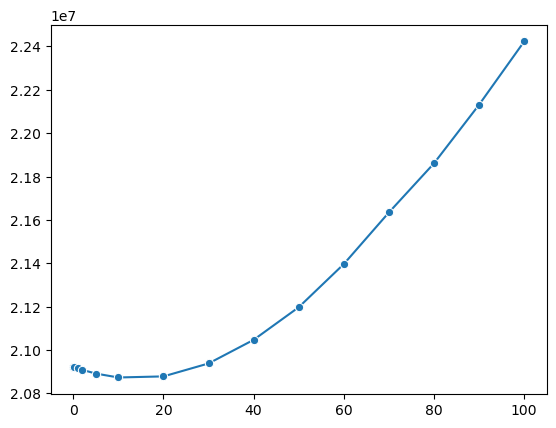

In [11]:
insurance_data = pd.read_csv("archive/insurance.csv")

X = insurance_data.drop(["charges"], axis=1) #Input
y = insurance_data["charges"] #Output

X = pd.get_dummies(X, columns=["region"], drop_first=True, dtype=int)

X["sex"] = X["sex"].map({"female":1, "male":0})
X["smoker"] = X["smoker"].map({"yes":1, "no":0})

X["age_smoker"] = X["age"]*X["smoker"]
X["bmi_smoker"] = X["bmi"]*X["smoker"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=42
)

alphas = [0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,100]
mses = []
for a in alphas:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train, y_train)


    y_pred = lasso_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    print(f"MSE for alpha{a} :", mse)

sns.lineplot(x=alphas, y=mses, marker="o")

Alpha values needs to be calculated by LassoCV

In [13]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

a = [0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,100]
lasso_cv_model = LassoCV(
    alphas=a,
    cv=5, # folds
    max_iter=1000,
    random_state=42
)
lasso_cv_model.fit(X_train, y_train)

print(f"Best Alpha : ", lasso_cv_model.alpha_)

y_pred = lasso_cv_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("mse : ", mse)

r2 = r2_score(y_test, y_pred)
print("r2 : ", r2)



Best Alpha :  0.001
mse :  20922599.87103596
r2 :  0.8652317499151699
